### Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

2023-11-15 01:12:46.908340: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 01:12:46.956769: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 01:12:46.957646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 01:12:48.097953: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Load MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


### CNN Models

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### Compile Model

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### Train Model

In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


2023-11-15 01:14:24.772199: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


  13/1875 [..............................] - ETA: 25s - loss: 9.8835 - accuracy: 0.2668 

2023-11-15 01:14:25.698303: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2023-11-15 01:14:25.698369: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2023-11-15 01:14:25.716393: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2023-11-15 01:14:25.716482: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.


1875/1875 [==============================] - 26s 14ms/step - loss: 0.2322 - accuracy: 0.9449 - val_loss: 0.0747 - val_accuracy: 0.9772
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0631 - accuracy: 0.9807 - val_loss: 0.0435 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0498 - val_accuracy: 0.9849
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0430 - accuracy: 0.9869 - val_loss: 0.0467 - val_accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0366 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0392 - val_accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0289 - accuracy: 0.9912 - val_loss: 0.0441 - val_accura

### Model Evaluation

313/313 - 1s - loss: 0.0469 - accuracy: 0.9883 - 1s/epoch - 3ms/step


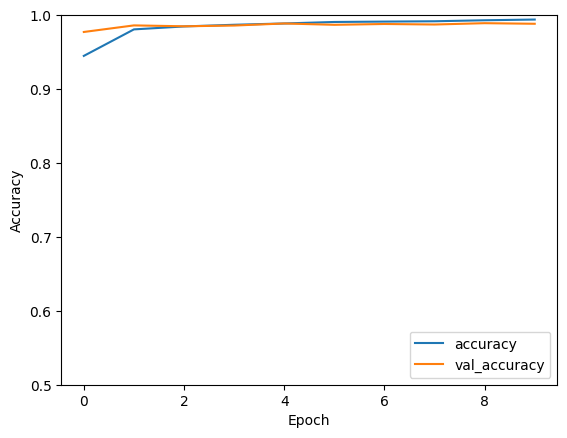

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [8]:
print(test_acc)

0.9883000254631042
